In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
from scipy import stats
from scipy.stats import norm 
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import poisson
import scipy.constants as const
from tabulate import tabulate
import math
%matplotlib inline

# Estimating $\pi$

In [ ]:
# # Generate N=1000 points (x,y) within a square of size [0,1]

# for i in range(N):
#     points = np.zeros((N, 2))
#     points[N, 0] = random.rvs()
#     points[N, 1] = random.rvs()
#     return

    

    

0.004


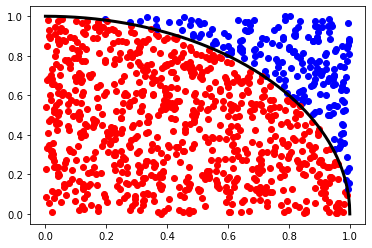

In [3]:
# a. Generate N=1000 random points (x,y) within a square by requiring the range of x and y are both within [0, 1].

points = np.zeros((1000, 2), dtype=object)


for i in range(1000):
    points[i, 0] = np.random.random([1])
    points[i, 1] = np.random.random([1])


for j in range (1000):
    if np.sqrt(points[j, 0] ** 2 + points[j, 1] **2 ) < 1:
        plt.scatter(points[j, 0], points[j, 1], s=None, c='r')
    else:
        plt.scatter(points[j, 0], points[j, 1], s=None, c='b')
        
        
x = np.linspace(0, 1, 1000)

plt.plot(x, np.sqrt(1 - x **2 ), '-k', lw=3)


# c. Count number of points inside the unit circle, and estimate the value and uncertainty of π

x = points[:, 0]
y = points[:, 1]

z = np.zeros(1000)

for i in range(1000):
    z[i]= np.sqrt(x[i]**2 + y[i]**2)

count_inside = len( np.where(z < 1.) )
pi = 1.*count_inside/1000 * 4.

print(pi)
    
# d. Repeat steps abobe with N=10K and 1000K. Discuss the results in terms of numerical consistency with known π 
# value, and scaling rule of the uncertainty.

In [ ]:
# a. Generate N=1000 random points (x,y) within a square by requiring the range of x and y are both within [0, 1].

# b. Visualize the result with red dots when data points are inside the unit circle (otherwise blue dots). 
# In the figure, draw the unit circle as boundar line.

def area(N):
    points = np.zeros((N, 2), dtype=object)
    for i in range(N):
        points[i, 0] = np.random.random([1])
        points[i, 1] = np.random.random([1])
    for j in range (N):
        if np.sqrt(points[j, 0] ** 2 + points[j, 1] **2 ) < 1:
            plt.scatter(points[j, 0], points[j, 1], s=None, c='r')
        else:
            plt.scatter(points[j, 0], points[j, 1], s=None, c='b')
    x = np.linspace(0, 1, N)
    plt.plot(x, np.sqrt(1 - x **2 ), '-k', lw=3)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Estimating pi with a random sample and unit circl')
plt.show()
    
area(1000)


# c. Count number of points inside the unit circle, and estimate the value and uncertainty of π
def estimate_pi(N):
    points = np.zeros((N, 2), dtype=object)
    x = points[:, 0]
    y = points[:, 1]
    z = np.zeros(N)
    def inside_circle(points):
        inside = []
        for i in range(N):
            if np.sqrt(points[i, 0] ** 2 + points[i, 1] ** 2) < 1:
                inside.append(1)
            else:
                inside.append(0)
        return inside
    inside = inside_circle(points)
    density = 4. * np.count_nonzero(inside) / N
    return density
    
print('For N = 1000, the estimate of pi is ' + str(estimate_pi(1000)))
# d. Repeat steps abobe with N=10K and 1000K. Discuss the results in terms of numerical consistency with known π 
# # value, and scaling rule of the uncertainty.

print('For N = 10000, the estimate of pi is ' + str(estimate_pi(10000)))
area(10000)
print('For N = 10000, the estimate of pi is ' + str(estimate_pi(100000)))
area(100000)

For N = 1000, the estimate of pi is 4.0
For N = 10000, the estimate of pi is 4.0


In [ ]:
def keep(N):   
    i = 0
    accept = np.zeros(N)
    def f(x):
        return x ** 2
    end = f(1)
    while i < N:
        x = random.uniform(low=-1., high=1.0, size=1)
        y = random.uniform(low=0., high=end, size=1)
        w = f(x)
        if w >= y:            
            accept[i] = x
            i = i + 1
    return accept

#Generate this sample until accepted events N=10000 events
rejection_sample = keep(10000)

In [ ]:
def transformed_inv(x):
    y = (3^(1/3)) * (x^(1/3))
    return y


In [ ]:
s = np.zeros(10000, dtype=object)
o = np.zeros(10000)
def f(x):
    return x**2